<a href="https://colab.research.google.com/github/NabilaCandra11/Praktikum_Struktur_Data/blob/main/Praktikum_8_Struktur_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import graphlib
import matplotlib.pyplot as plt
# Membuat class untuk graph visualization
class Graph:
    def __init__(self):
        self.edges = {}

    def add_edge(self, source, destination, weight):
        # Tambahkan edge ke dalam graph
        if source not in self.edges:
            self.edges[source] = []
        self.edges[source].append((destination, weight))

    def shortest_path(self, source, destination):
        distances = {}
        visited = set()

        # Inisialisasi jarak dari source ke setiap node dengan nilai tak terhingga
        for node in self.edges:
            distances[node] = float('inf')

        # Jarak dari source ke source adalah 0
        distances[source] = 0
        # Priority queue untuk menyimpan node yang akan dieksplorasi
        queue = [(0, source)]


        while queue:
            distance, node = Graph.heappop(queue)

            # Jika node sudah merupakan tujuan, kembalikan jarak ke tujuan
            if node == destination:
                return distances[destination]

            # Jika node sudah dikunjungi, lanjut ke iterasi berikutnya
            if node in visited:
                continue

            visited.add(node)

            # Iterasi melalui tetangga-tetangga node
            for neighbor, weight in self.edges[node]:
                if neighbor not in visited:
                    new_distance = distance + weight
                    # Update jarak terpendek jika ditemukan jarak yang lebih pendek
                    if new_distance < distances[neighbor]:
                        distances[neighbor] = new_distance
                        graphlib.heappush(queue, (new_distance, neighbor))

        return distances[destination]

    def draw(self):
        # Visualisasi graph menggunakan matplotlib
        fig, ax = plt.subplots()

        for node in self.edges:
            for neighbor, weight in self.edges[node]:
                ax.plot([node, neighbor], [0, 0], linewidth=weight)
                ax.text((node + neighbor) / 2, 0, str(weight), ha='center', va='center')

        ax.set_title('Shortest Path Graph')
        plt.show()

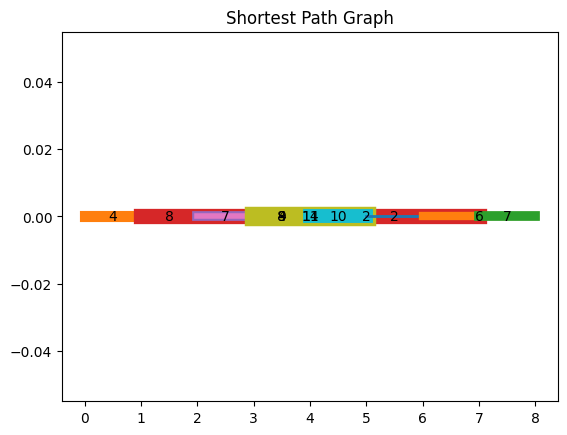

In [13]:
graph = Graph()

graph.add_edge(0, 1, 4);
graph.add_edge(0, 7, 8);
graph.add_edge(1, 2, 8);
graph.add_edge(1, 7, 11);
graph.add_edge(2, 3, 7);
graph.add_edge(2, 8, 2);
graph.add_edge(2, 5, 4);
graph.add_edge(3, 4, 9);
graph.add_edge(3, 5, 14);
graph.add_edge(4, 5, 10);
graph.add_edge(5, 6, 2);
graph.add_edge(6, 8, 6);
graph.add_edge(7, 8, 7);

graph.draw()